In [10]:
#from bs4 import BeautifulSoup
#import requests
#import pandas as pd

#link = 'https://en.wikipedia.org/wiki/List_of_Superfund_sites_in_New_Jersey'

#response = requests.get(link)
#soup = BeautifulSoup(response.text,'html.parser')
#sites_list = soup.find('table',attrs={'class':"wikitable sortable"})
#df = pd.read_html(str(sites_list))[0]
#df.head()
#df.to_csv('superfund_sites.csv',index=False)

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from shapely.geometry import Point



In [ ]:
NJ_NPL = "H:\\My Drive\\YEARS\\Year Two\\Projects\\WikiScraper\\Datasets\\NJ_SS_NPL.xlsx"
NJ_NOT_NPL = "H:\\My Drive\\YEARS\\Year Two\\Projects\\WikiScraper\\Datasets\\NJ_SS_NOTNPL.xlsx"

nj_npl = pd.read_excel(NJ_NPL)
nj_notnpl = pd.read_excel(NJ_NOT_NPL)

nj_npl["Coordinates"] = list(zip(nj_npl.Lon, nj_npl.Lat))
nj_npl["Coordinates"] = nj_npl["Coordinates"].apply(Point)

nj_notnpl["Coordinates"] = list(zip(nj_notnpl.Lon, nj_notnpl.Lat))
nj_notnpl["Coordinates"] = nj_notnpl["Coordinates"].apply(Point)



#nj_nplcoords = gpd.GeoDataFrame(nj_npl, geometry='Coordinates')
#nj_notnplcoords = gpd.GeoDataFrame(nj_notnpl, geometry='Coordinates')


nj_life = pd.read_excel("H:\\My Drive\\YEARS\\Year Two\\Projects\\WikiScraper\\Datasets\\NJ_LIFE_EXPECTANCY_COUNTY.xlsx")
#cols = [0,1,2,3]
#nj_life.drop(nj_life.columns[3], axis=1, inplace=True)
#nj_life.drop(nj_life.columns[2], axis=1, inplace=True)

state_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_state_5m.zip")
county_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip")



#county_df = county_df.query("STATEFP == '34'")
#nj_life["county"] = nj_life["county"].str.title()
#nj_life["county"] = nj_life["county"].str.strip()
#county_df["NAME"] = county_df["NAME"].str.title()
#county_df["NAME"] = county_df["NAME"].str.strip()

#plt.show()




In [156]:
county_df = county_df.query("STATEFP == '34'")


nj_life.columns = ["county", "life_exp"]


nj_life["county"] = nj_life["county"].str.title()
nj_life["county"] = nj_life["county"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()


combined = county_df.merge(nj_life, left_on="NAME", right_on="county", how="left")

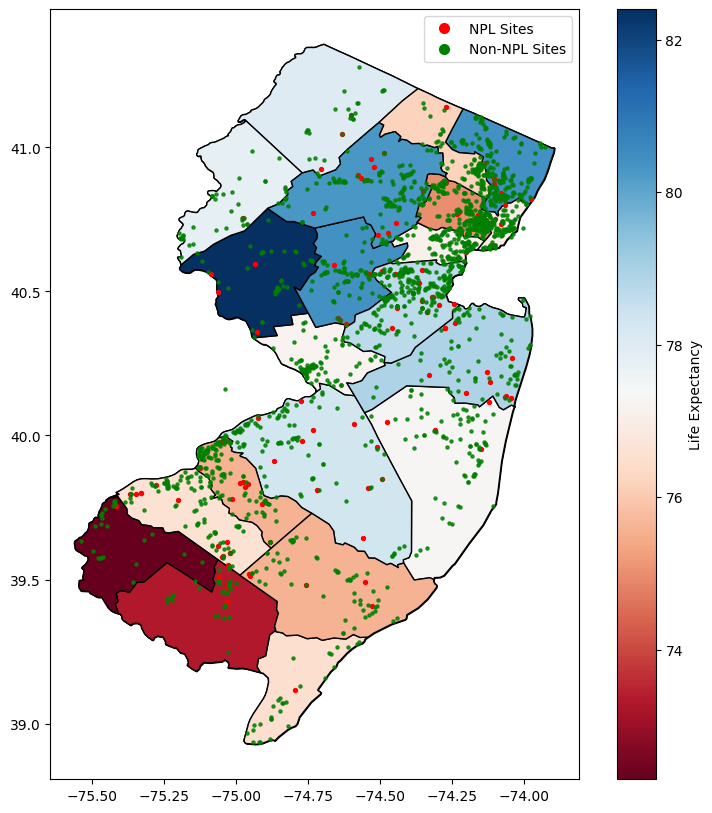

In [170]:
fig, gax = plt.subplots(figsize=(10, 10))
state_df.query("NAME == 'New Jersey'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")


combined.plot(
    ax=gax, edgecolor="black", column="life_exp", legend=True, cmap ='RdBu'  ,legend_kwds={"label": "Life Expectancy"}
)
#mun_df.plot(ax=gax, edgecolor="black", color="white")

nj_nplcoords.plot(ax=gax, color="Red", label="NPL Sites", markersize=8)
nj_notnplcoords.plot(ax=gax, color="Green", label="Non-NPL Sites", markersize=5, alpha=0.8)


import matplotlib.lines as mlines

# Create custom legend
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=7, label='NPL Sites')
green_dot = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=7,  label='Non-NPL Sites')

# Add legend to the plot
gax.legend(handles=[red_dot, green_dot], loc='upper right')

plt.show()
